# Eksploracyjna Analiza Danych

Analiza eksploracyjna posiadanego zbioru danych dotyczącego przewidywanej długości życia.

**Przedmiot:** Metody Eksploracji Danych

**Autorzy:** Stanisław Dutkiewicz, Paweł Myszka, Łukasz Jugo

**Grupa 6**

**Data:** 22 grudnia 2025

## Ładowanie bibliotek i zbioru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('Life Expectancy Data.csv')
print(df.info())
print(f"Liczba krajów: {df['Country'].unique().size}")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Analiza struktury zbioru danych

In [2]:
#podstawe informacje o df
df.info()

#ustalenie kolumn numerycznych
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nLiczba zmiennych numerycznych: {len(numeric_cols)}")

#Znienna docelowa
target_col = 'Life expectancy'
print(f"\nZmienna objaśniana (target): {target_col}")    
print(f"Pozostałe zmienne określają zmienne objaśnioną")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Opis poszczególnych cech

- **country** - nazwa kraju
- **year** - rok z którego zebrane zostały dane
- **status** - atrybut binarny przyjmujący dwie wartości "developed" lub "developing"
- **life expectancy** - przewidywana długość życia w latach
- **adult mortality** - wskaźnik umieralności wśród ludzi w wieku 15-60 lat (ilość zgonów na 1000 mieszkańców)
- **infant deaths** - liczba zgonów niemowląt na 1000 mieszkańców
- **alcohol** - wskaźnik spożycia alkoholu zdefiniowany jako ilość litrów czystego alkoholu wypitego przez przecietnego mieszkańca w wieku powyżej 15 lat
- **percentage expenditure** - wydatki na zdrowie jako procent PKB per capita
- **hepatitis B** - procent zaszczepionych roczniaków przeciwko wirusowym zapaleniu wątroby typu B 
- **measles** - ilość wykrytych przypadków odry na 1000 mieszkańców
- **BMI** - średni wskaźnik BMI w populacji
- **under-five deaths** - liczba zgodnów dzieci poniżej 5 roku życia na 1000 mieszkańców
- **polio** - procent zaszczepionych roczniaków przeciwko polio
- **total expenditure** - wydatki na zdrowie jako procent całkowitych wydatków rządu
- **diphtheria** - procent zaszczepionych roczniaków szczepionką DTP(błonica, tężec, krztusiec)
- **HIV/AIDS** - liczba zgonów wśród dzieci w wieku 0-4 lat na HIV lub AIDS na 1000 narodzin
- **GDP** - PKB per capita w dolarach
- **population** - populacja kraju
- **thinness 1-19 years** - procent dzieci i nastolatków w wieku 1-19 lat, które są szczupłe
- **thinness 5-9 years** - procent dzieci w wieku 5-9 lat, które są szczupłe
- **income composition of resources** - wskaźnik rozwoju społeczno-gospodarczego kraju (HDI) w ujęciu dochodowym (komponent dochodowy wskaźnika); wskaźnik waha się od 0 do 1
- **schooling** - liczba lat edukacji do szkoły średniej włącznie

## Wymiary i Struktura Zbioru Danych

Zbiór danych **Life Expectancy** zawiera:
- **2938 obserwacji** (wierszy) - dane dla poszczególnych krajów i lat
- **22 zmienne** (kolumny) - w tym 16 zmiennych float64, 4 zmienne int64 i 2 zmienne kategoryczne (object)
- **20 zmiennych numerycznych** dostępnych do analizy
- **Zmienna docelowa**: *Life expectancy* (oczekiwana długość życia w latach)
- **Zmienne objaśniające**: Pozostałe 19 zmiennych numerycznych oraz Status (binarna)

Zbiór obejmuje dane z 193 krajów za lata 2000-2015. Struktura jest regularna - każda obserwacja reprezentuje kraj-rok. Zmienne obejmują wskaźniki zdrowotne (śmiertelność, choroby zakaźne, HIV/AIDS), ekonomiczne (PKB, ekspozycja zdrowotna, skład dochodów) i społeczne (szkolnictwo, alkohol).

## Analiza zależności pomiędzy atrybutami

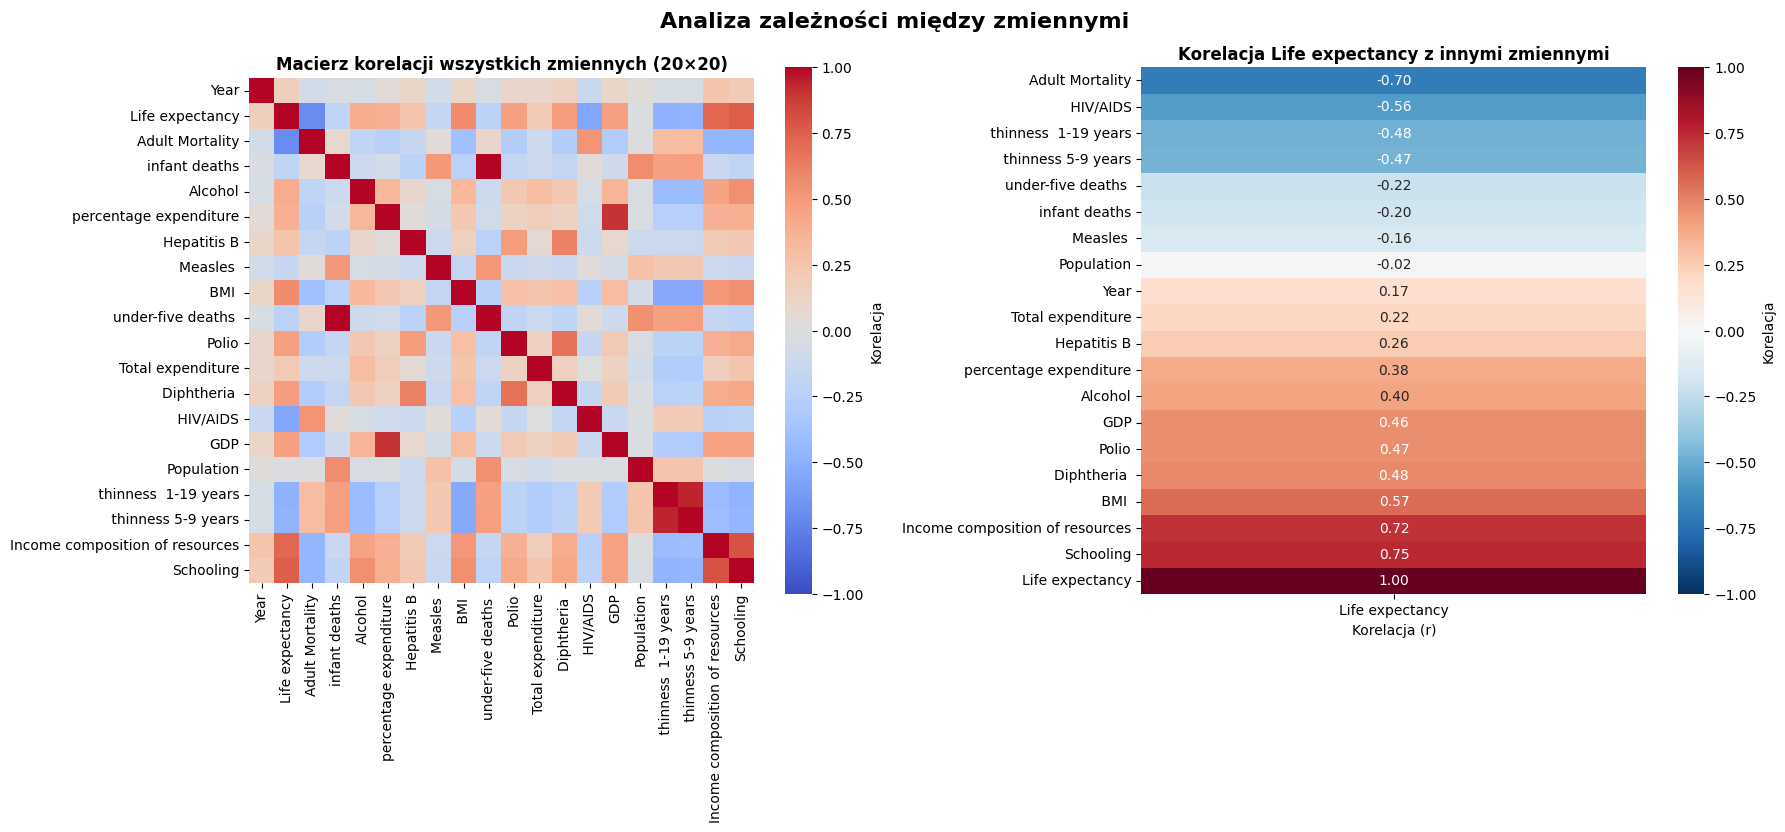

10 cech o największej korelacji co do wartości bezwględnej względem zmiennej docelowej:


,cecha,wartość korelacji,rodzaj korelacji,stopień korelacji
0,Schooling,0.751975,dodatnia,SILNA
1,Income composition of resources,0.724776,dodatnia,SILNA
2,Adult Mortality,0.696359,ujemna,umiarkowana
3,BMI,0.567694,dodatnia,umiarkowana
4,HIV/AIDS,0.556556,ujemna,umiarkowana
5,Diphtheria,0.479495,dodatnia,umiarkowana
6,thinness 1-19 years,0.477183,ujemna,umiarkowana
7,thinness 5-9 years,0.471584,ujemna,umiarkowana
8,Polio,0.465556,dodatnia,umiarkowana
9,GDP,0.461455,dodatnia,umiarkowana


In [3]:
# Macierz korelacji dla wszystkich zmiennych numerycznych
correlation_matrix = df[numeric_cols].corr()

# Przygotowanie wizualizacji
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Analiza zależności między zmiennymi', fontsize=16, fontweight='bold')

#macierz korelacji między zmiennymi
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Korelacja'}, vmin=-1, vmax=1)
axes[0].set_title(f'Macierz korelacji wszystkich zmiennych ({len(numeric_cols)}×{len(numeric_cols)})', fontweight='bold')

#korelacja zmiennej docelowej z innymi zmiennymi
life_expectancy_corr = correlation_matrix[target_col].sort_values(ascending=True)
    
#heatmapa
sns.heatmap(life_expectancy_corr.to_frame(), annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=axes[1], cbar_kws={'label': 'Korelacja'}, vmin=-1, vmax=1)
axes[1].set_title(f'Korelacja {target_col} z innymi zmiennymi', fontweight='bold')
axes[1].set_xlabel('Korelacja (r)')

plt.tight_layout()
plt.show()

print(f"10 cech o największej korelacji co do wartości bezwględnej względem zmiennej docelowej:")
top = pd.DataFrame(columns=["cecha", "wartość korelacji", "rodzaj korelacji", "stopień korelacji"])
top_correlations = life_expectancy_corr.abs().nlargest(11)[1:11]  # pominiecie Life exectancy
for i, (cecha, corr) in enumerate(top_correlations.items(), 0):
    strength = "SILNA" if abs(corr) > 0.7 else ("umiarkowana" if abs(corr) > 0.4 else "słaba")
    direction = "dodatnia" if life_expectancy_corr[cecha] > 0 else "ujemna"
    top.loc[i] = [cecha, corr, direction, strength]
top
    

## Wnioski z analizy korelacji
Na przewidywaną długość życia największy wpływ mają wykształcenie oraz zamożność społeczeństwa. Nie dziwi również pozytywny wpływ szczepień ochronnych na różne choroby zakaźne (np. polio). Ważną kwestią są czynniki związane z głodem - niedożywienie w grupie dzieci oraz nastolatków jak również wskaźnik BMI ogółu społeczeństwa. Na podstawie danych można śmiało postawić tezę, że głód jest równie groźny co wiele chorób zakaźnych. Warto również zwrócić uwagę na fakt, iż brak podstawowych substancji odżywczych wpływa negatywnie na układ odpornościowy i zwiększa ryzyko zachorowania, dlatego wystąpienie jednego z tych czynników może zwiększyć prawdopodobieństwo wystąpienia drugiego. W dalszych dywagacjach zdecydowanie nie należy brać pod uwagę czynników powiązanych ze śmiercią (takich jak np. wskaźnik umieralności), gdyż ich powiązanie z przewidywaną długością życia jest oczywiste.

Kolejną ciekawą kwestią jest fakt, iż edukacja i spożycie alkoholu mają korelację dodatnią. Wydawałoby się, że raczej osoby o niskim wykształceniu będą częściej sięgały po alkohol, a współczynnik korelacji mówi o sytuacji odwrotnej. Być może jest to traktowane przez wielu ludzi jako metoda radzenia sobie ze stresem, którego poziom intuicyjnie zdaje się zwiększać wraz z wykształceniem (a co za tym idzie pozycją w społeczeństwie/organizacjach).

Pozytywną korelację mają ze sobą również szczepienia na różne chroby - świadczy to o tym, że raczej jak ktoś szczepi się to robi to na kilka chorób, a nie realizuje jedynie pojedyncze szczepienie.

## Zakresy i stopień zmienności zmiennych

In [7]:
summary_stats = df[numeric_cols].describe().T
summary_stats['CV%'] = (summary_stats['std'] / summary_stats['mean']) * 100
summary_stats = summary_stats[['min', 'max', '25%', '50%', '75%', 'mean', 'std', 'CV%']]

if 'Year' in summary_stats.index:
    summary_stats = summary_stats.drop('Year')

# wyalczenie notacji naukowej
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(f"\nStatystyki opisowe:")
print(summary_stats)

# powrot
pd.reset_option('display.float_format')


Statystyki opisowe:
                                  min           max       25%        50%  \
Life expectancy                 36.30         89.00     63.10      72.10   
Adult Mortality                  1.00        723.00     74.00     144.00   
infant deaths                    0.00       1800.00      0.00       3.00   
Alcohol                          0.01         17.87      0.88       3.75   
percentage expenditure           0.00      19479.91      4.69      64.91   
Hepatitis B                      1.00         99.00     77.00      92.00   
Measles                          0.00     212183.00      0.00      17.00   
 BMI                             1.00         87.30     19.30      43.50   
under-five deaths                0.00       2500.00      0.00       4.00   
Polio                            3.00         99.00     78.00      93.00   
Total expenditure                0.37         17.60      4.26       5.75   
Diphtheria                       2.00         99.00     78.00      


Zmienne z największą zmiennością (CV > 50%):
   - Population: CV = 478.40%
   - Measles : CV = 473.93%
   - infant deaths: CV = 389.15%
   - under-five deaths : CV = 381.69%
   -  HIV/AIDS: CV = 291.47%
   - percentage expenditure: CV = 269.27%
   - GDP: CV = 190.70%
   -  thinness 5-9 years: CV = 92.58%
   -  thinness  1-19 years: CV = 91.33%
   - Alcohol: CV = 88.04%
   - Adult Mortality: CV = 75.42%
   -  BMI : CV = 52.31%


<Axes: ylabel='under-five deaths '>

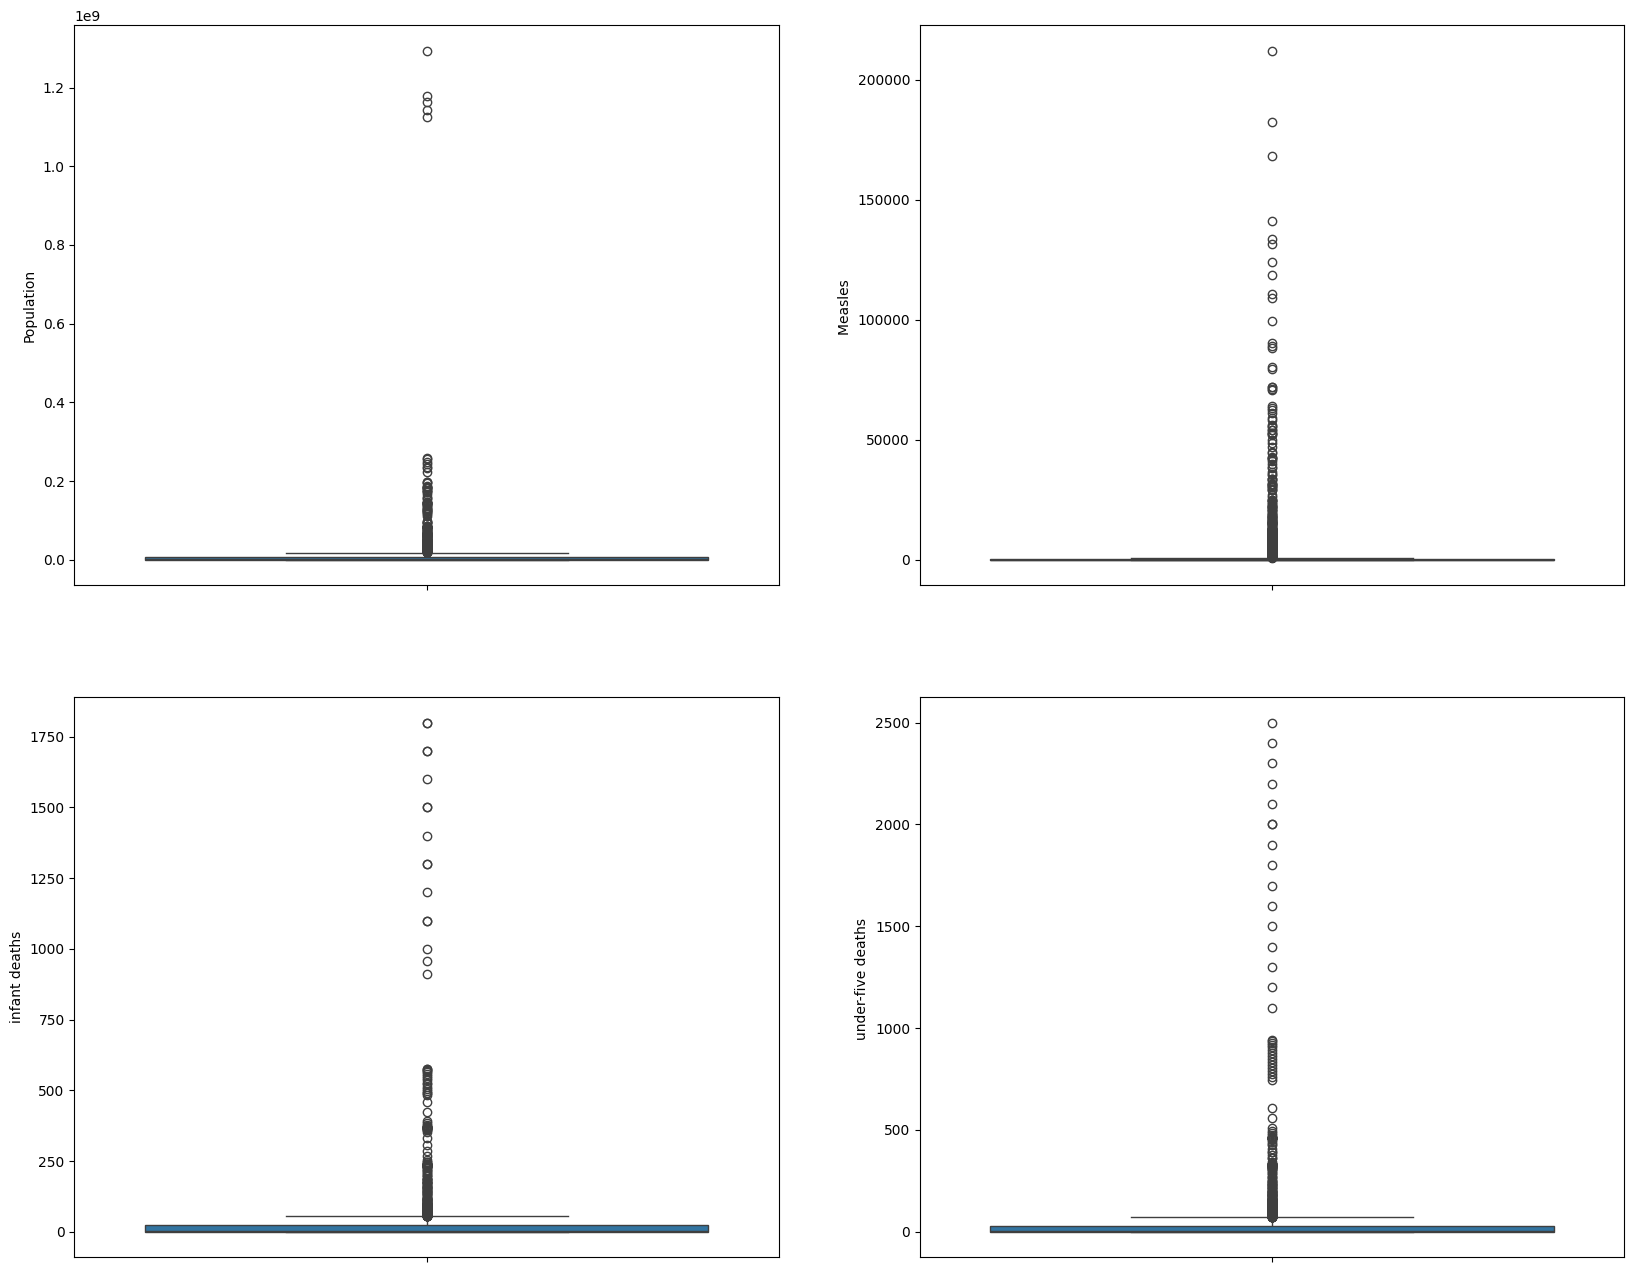

In [8]:
# Analiza zmienności
print(f"\nZmienne z największą zmiennością (CV > 50%):")
high_cv = summary_stats[summary_stats['CV%'] > 50].sort_values('CV%', ascending=False)
if len(high_cv) > 0:
    for idx, row in high_cv.iterrows():
        print(f"   - {idx}: CV = {row['CV%']:.2f}%")

fig, ax = plt.subplots(2,2, figsize=(20,16))
sns.boxplot(y=df[high_cv.index[0]], ax=ax[0,0])
sns.boxplot(y=df[high_cv.index[1]], ax=ax[0,1])
sns.boxplot(y=df[high_cv.index[2]], ax=ax[1,0])
sns.boxplot(y=df[high_cv.index[3]], ax=ax[1,1])

Min: 36.30
Max: 89.00
Średnia: 69.22
dch. std: 9.52
Mediana: 72.10
Zmiennosc: 13.76%


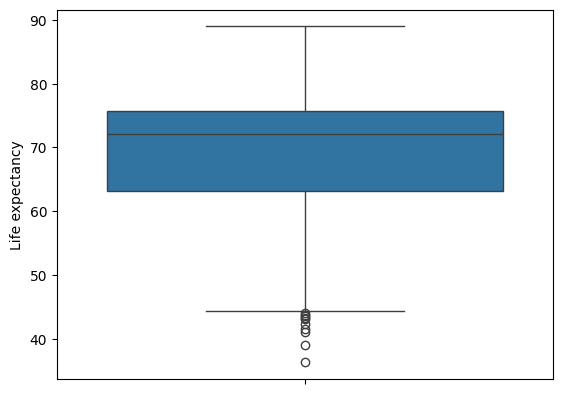

In [9]:
# Główna zmienna celu
target_stat = df[target_col].describe()
cv_target = (target_stat['std'] / target_stat['mean']) * 100
print(f"Min: {target_stat['min']:.2f}")
print(f"Max: {target_stat['max']:.2f}")
print(f"Średnia: {target_stat['mean']:.2f}")
print(f"dch. std: {target_stat['std']:.2f}")
print(f"Mediana: {target_stat['50%']:.2f}")
print(f"Zmiennosc: {cv_target:.2f}%")
sns.boxplot(y=df[target_col])
plt.show()

## Wnioski z analizy zmienności

**Zmienne o ekstremalnej zmienności (CV > 200%)**:
- Population (478.40%), Measles (473.93%), infant deaths (389.15%), under-five deaths (381.69%)

Jak pokazały wykresy pudełkowe w przypadku tych atrybutów na zmienność bardzo duży wpływ mają wartości odstające

**Zmienne o wysokiej zmienności (100% < CV < 200%)**:
- HIV/AIDS (291.47%), percentage expenditure (269.27%), GDP (190.70%)

**Zmienne o umiarkowanej zmienności (50% < CV < 100%)**:
- thinness 5-9 years (92.58%), thinness 1-19 years (91.33%), Alcohol (88.04%), Adult Mortality (75.42%), BMI (52.31%)

**Zmienna docelowa - Life expectancy (CV = 13.76%)**:
- Zakres: 36.30–89.00 lat | Średnia: 69.22 lat | Odch. std: 9.52 lat

Zmienne objaśniające wykazują znacznie większą zmienność niż zmienna docelowa. Ekstremalne wartości CV obserwuje się dla zmiennych związanych z liczbą zdarzeń (zgony, choroby) jak również dla populacji (tutaj jest 5 krajów o populacji która bardzo zawyża), sugerując konieczność normalizacji danych przed modelowaniem. Ewentualną opcją jest też eleminacja rekordów z wartościami odstającymi np. największych krajów świata.

## Analiza brakujących danych

In [10]:
# Liczba i procent brakujących danych
missing_data = pd.DataFrame({
    'Liczba_brakujących': df.isnull().sum(),
    'Procent_brakujących': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Liczba_brakujących'] > 0].sort_values('Procent_brakujących', ascending=False)

print(f"\nZmienne z brakującymi danymi:")
if len(missing_data) > 0:
    print(missing_data)
    print(f"\nCałkowity procent kompletnych obserwacji: {(df.dropna().shape[0]/df.shape[0]*100):.2f}%")

# Zmienne z 100% wypełnieniem
complete_vars = df.columns[df.isnull().sum() == 0].tolist()
print(f"\nZmienne w pełni wypełnione ({len(complete_vars)}):")
for var in complete_vars:
    print(f"   - {var}")


Zmienne z brakującymi danymi:
                                 Liczba_brakujących  Procent_brakujących
Population                                      652                22.19
Hepatitis B                                     553                18.82
GDP                                             448                15.25
Total expenditure                               226                 7.69
Alcohol                                         194                 6.60
Income composition of resources                 167                 5.68
Schooling                                       163                 5.55
 BMI                                             34                 1.16
 thinness  1-19 years                            34                 1.16
 thinness 5-9 years                              34                 1.16
Polio                                            19                 0.65
Diphtheria                                       19                 0.65
Life expectancy     

## Wnioski z analizy kompletności danych

**Zmienne z Brakującymi Danymi**:
14 z 22 zmiennych zawiera brakujące wartości:
- **Duże braki (> 5%)**: Population (22.19%), Hepatitis B (18.82%), GDP (15.25%), Total expenditure (7.69%), Alcohol (6.60%), Income composition of resources (5.68%), Schooling (5.55%)
- **Małe braki (< 2%)**: BMI, thinness (1.16%), Polio & Diphtheria (0.65%), Life expectancy i Adult Mortality (0.34%)

**Kompletne Obserwacje**: **56.13% obserwacji zawiera pełne dane** (1,651 z 2,938 obserwacji). Brakuje danych w 43.87% wierszy.

**Zmienne Całkowicie Wypełnione (8 zmiennych)**: Country, Year, Status, infant deaths, percentage expenditure, Measles, under-five deaths, HIV/AIDS

Niestety w przypadku zmiennych o największej korelacji względem naszej zmiennej docelowej nieco ponad 5% danych brakuje. Jeśli weźmiemy pod uwagę obie te zmienne to w pesymistycznym przypadku istnieje ryzyko utraty nawet około 11% danych na których będziemy trenować nasz późniejszy model. Wartą rozważenia jest zdecydowanie próba uzupełnienia braków w niektórych przypadkach np. wartościami z lat poprzednich albo np. średnią z lat poprzednich i jej wpływu na nasz model regresyjny. Warto również pochylić się nad atrybutami o mniejszej korelacji takimi jak np. HIV/AIDS czy BMI ale o niższym procencie braków (HIV/AIDS jest pełne). Najprostszym rozwiązaniem byłoby zdecydowanie usunięcie brakujących wpisów, jednak tym sposobem tracimy prawie 44% pierwotnych danych co może wprowadzić dodatkowe obciążenie naszego modelu w kierunku krajów o bardziej rozwiniętej sprawozdawczości (a więc raczej bogatszych i jak pokazała korelacja o potencjalnie większej długości życia).

## Analiza rozkładu zmiennych kluczowych

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

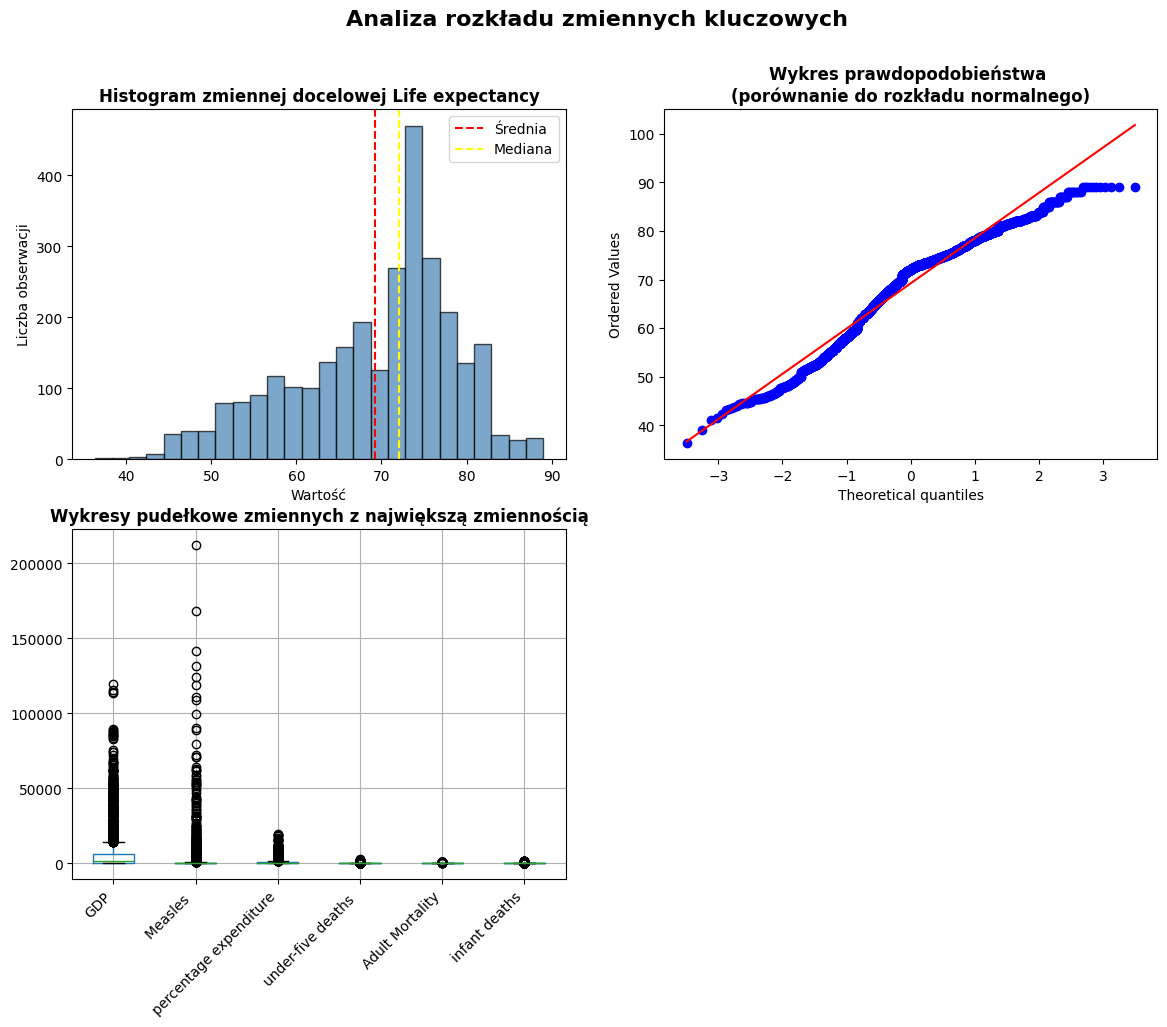

In [11]:
# Przygotowanie danych do wizualizacji
df_numeric = df[numeric_cols].dropna()

# Rozkład zmiennej docelowej
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Analiza rozkładu zmiennych kluczowych', fontsize=16, fontweight='bold')

# Histogram zmiennej celu
bins = int(np.floor((max(df[target_col])-min(df[target_col])) /2))
axes[0, 0].hist(df[target_col].dropna(), bins=bins, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Histogram zmiennej docelowej {target_col}', fontweight='bold')
axes[0, 0].set_xlabel('Wartość')
axes[0, 0].set_ylabel('Liczba obserwacji')
axes[0, 0].axvline(df[target_col].mean(), color='red', linestyle='--', label='Średnia')
axes[0, 0].axvline(df[target_col].median(), color='yellow', linestyle='--', label='Mediana')
axes[0, 0].legend()
    
# wykres prawdopodobieństwa
stats.probplot(df[target_col].dropna(), dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Wykres prawdopodobieństwa \n(porównanie do rozkładu normalnego)', fontweight='bold')

# Wykres pudełkowy dla zmiennych numerycznych (bez populacji)
top_vars = df_numeric.std().nlargest(10).index.tolist()
top_vars = [var for var in top_vars if var != 'Population'][:6]
df_top = df[top_vars].dropna()
df_top.boxplot(ax=axes[1, 0])
axes[1, 0].set_title('Wykresy pudełkowe zmiennych z największą zmiennością', fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

axes[1, 1].axis('off')

## Wnioski z analizy rozkładu zmiennych kluczowych

**Histogram zmiennej celu Life expectancy**: 

Rozkład zbliżony do normalnego z dominantą wokół 74 lat. Średnia (czerwona linia) znajduje się blisko mediany (żółta linia) co wskazuje na dużą symetryczność rozkładu naszej zmiennej. 

**Wykres prawdopodobieństwa (Normalność rozkładu)**: 

Punkty leżą blisko linii prostej (czerowny kolor) wyznaczonej na podstawie rozkładu normalnego. Szczególnie na początku i w środkowej części, co wskazuje na duże podobieństwo rozkładu naszej zmiennej do rozkładu normalnego w tych zakresach. Dla wartości typowych niemal nakładają się one z wartościami wynikającymi z rozkładu normalnego. Jednakże z prawej strony możemy zaobserwować lekki "ogon" spowodowany faktem, iż założenia o przeżyciu powyżej 90 lat są obecnie jeszcze prawie niemożliwe. Z tego względu nasz rozkład nie jest idealnie normalny w całym zakresie zmienności, aczkolwiek w dolnym i środkowym zakresie jest on bardzo podobny

**Wykres pudełkowy zmiennych**:
- Zmienne GDP, Measles i percentage expenditure wykazują spore wartości odstające (górne punkty)
- Zmienne under-five deaths, adult mortality, infant deaths cechują się większym zbliżeniem ich wartości maksymalnych do wartości typowych

## Analiza wykresów punktowych Life expectancy-zmienne o silnej korelacji

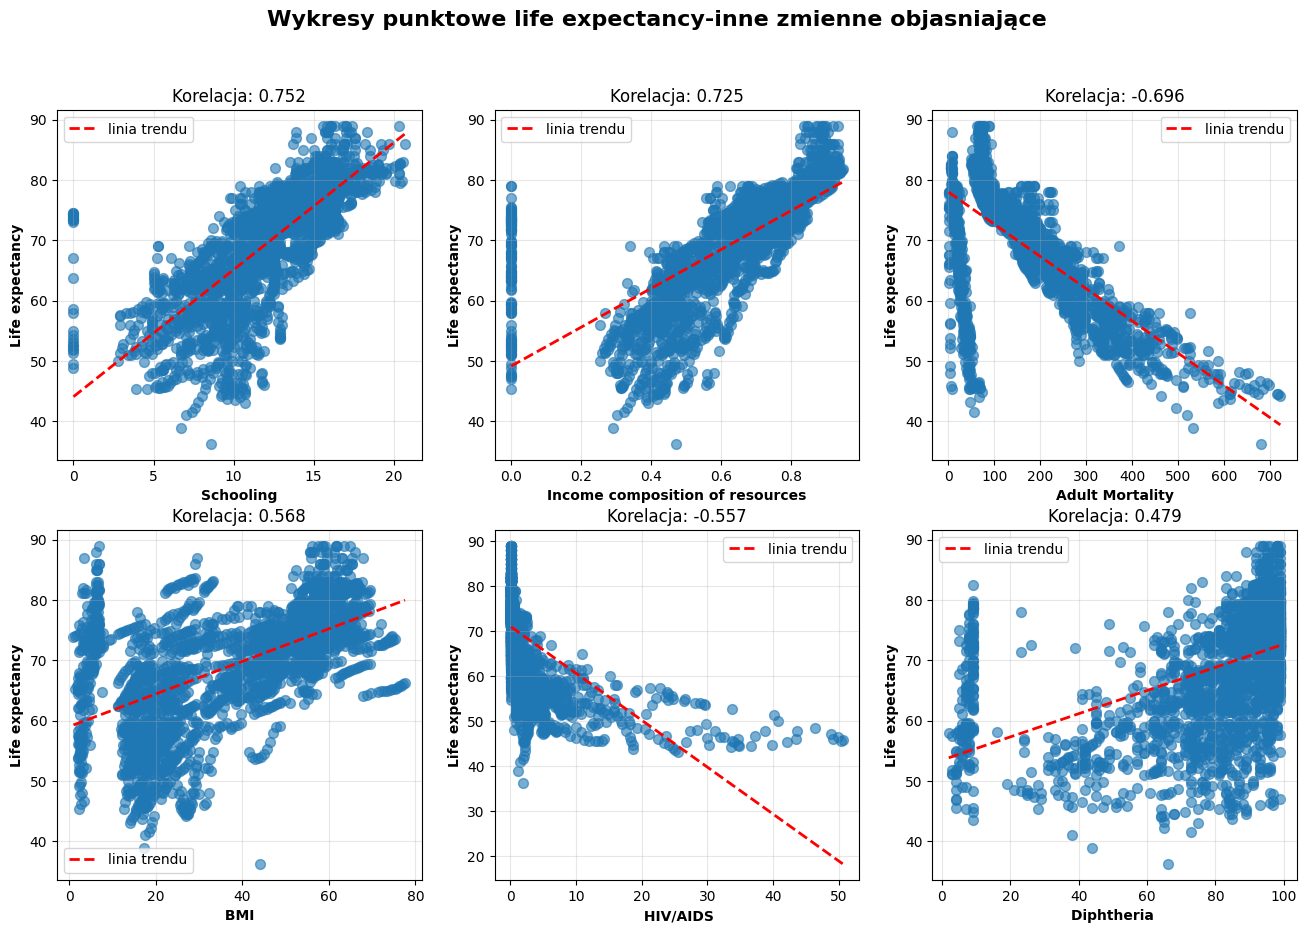

In [12]:
top_predictors = life_expectancy_corr.abs().nlargest(7)[1:].index.tolist()  # bez zmiennej opisywanej
    
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle(f'Wykresy punktowe life expectancy-inne zmienne objasniające', fontsize=16, fontweight='bold')
axes = axes.ravel()
    
for idx, var in enumerate(top_predictors[:6]):
    df_clean = df[[var, target_col]].dropna()
    axes[idx].scatter(df_clean[var], df_clean[target_col], alpha=0.6, s=50)
    
    # Linia trendu
    z = np.polyfit(df_clean[var], df_clean[target_col], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_clean[var].min(), df_clean[var].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, label=f'linia trendu')
        
    axes[idx].set_xlabel(var, fontweight='bold')
    axes[idx].set_ylabel(target_col, fontweight='bold')
    axes[idx].set_title(f'Korelacja: {life_expectancy_corr[var]:.3f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    


## Wnioski z analizy wykresów pudełkowych
Zgodnie ze wcześniejszymi analizami wynikającymi z macierzy korelacji zależności dodatnie wykazują relacje z wykresów 1,2,4,6, zaś ujemne z 3 i 5. Na wykresach punktowych widać braki w danych (wartości na osiach równe 0). Po ich usunięciu powinniśmy zaobserwować jeszcze mocniejszą zależność liniową pomiędzy zaleznościami np. na 1 i 2 wykresie. Na podstawie wykresów możemy stwierdzić, że najlepsze do dalszego tworzenia modelu regresyjnego zdają się być zależności z wykresów 1 i 2 ze względu na duży współczynnik korelacji oraz liniowe ułożenie argumentów w zależności, które byłoby jeszcze bardziej wzmocnione poprzez rozwiązanie sprawy brakujących danych.

## Analiza przewidywanej długości życia w zależności od wartości atrybutu binarnego status

In [48]:
stat_developing = df[df['Status'] == 'Developing'].describe()
stat_developing['Life expectancy']

count    2416.000000
mean       67.111465
std         9.006092
min        36.300000
25%        61.100000
50%        69.000000
75%        74.000000
max        89.000000
Name: Life expectancy, dtype: float64

In [50]:
stat_developed = df[df['Status'] == 'Developed'].describe()
stat_developed['Life expectancy']

count    512.000000
mean      79.197852
std        3.930942
min       69.900000
25%       76.800000
50%       79.250000
75%       81.700000
max       89.000000
Name: Life expectancy, dtype: float64

Text(0.5, 1.0, 'Kraje rozwijające się')

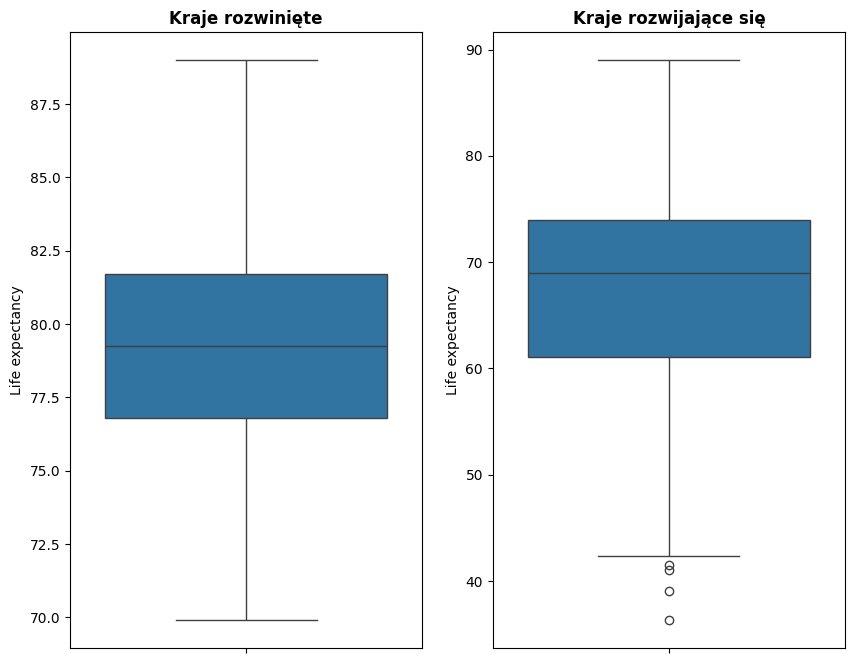

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))
sns.boxplot(y=df[df['Status'] == 'Developed']['Life expectancy'], ax=ax[0])
ax[0].set_title('Kraje rozwinięte', fontweight='bold')
sns.boxplot(y=df[df['Status'] == 'Developing']['Life expectancy'], ax=ax[1])
ax[1].set_title('Kraje rozwijające się', fontweight='bold')

## Wnioski z analizy względem atrybutu binarnego

Jak można było się spodziewać w krajach rozwijających się średnia przewidywana długość życia jest znacznie mniejsza od tej w krajach rozwiniętych. Ponadto w krajach rozwijających się cechuje się ona większą zmiennością (chociażby patrząc na odchylenie standardowe czy wykresy pudełkowe). Jednakże warto również zauważyć, iż istnieją kraje rozwijające się w których przewidywana długość życia jest zbliżona do tej w krajach rozwiniętych - prawdopodobnie są to kraje będące na granicy pomiędzy krajami rozwiniętymi a rozwijającymi się.

Patrząc na jednoznaczny wpływ tego atrybutu binarnego na przewidywaną długość życia warto go również uwzględnić w przypadku dalszej budowy modelu regresyjnego.

## Przewidywana długość życia na kontynentach

In [ ]:
# Lista krajów z pliku CSV należących do Afryki
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Congo', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Togo',
    'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'
]

# Lista krajów z pliku CSV należących do Azji
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei Darussalam', 'Cambodia', 'China', 'Democratic People\'s Republic of Korea',
    'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq',
    'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
    "Lao People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives',
    'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar',
    'Republic of Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
    'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey',
    'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'
]

# Lista krajów z pliku CSV należących do Europy
europe = [
    'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
    'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
    'Republic of Moldova', 'Romania', 'Russian Federation', 'San Marino',
    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'The former Yugoslav republic of Macedonia', 'Ukraine',
    'United Kingdom of Great Britain and Northern Ireland'
]

# Lista krajów z pliku CSV należących do Ameryki Północnej (w tym Środkowej i Karaibów)
north_america = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
    'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador',
    'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
    'United States of America'
]

# Lista krajów z pliku CSV należących do Ameryki Południowej
south_america = [
    'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile',
    'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
    'Uruguay', 'Venezuela (Bolivarian Republic of)'
]

# Lista krajów z pliku CSV należących do Australii
australia = [
    'Australia', 'Cook Islands', 'Fiji', 'Kiribati', 'Marshall Islands',
    'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Niue',
    'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga',
    'Tuvalu', 'Vanuatu'
]

**Europa**

In [30]:
stat_europe = df[df['Country'].isin(europe)].describe()
stat_europe['Life expectancy']

count    640.000000
mean      77.487031
std        4.830910
min       64.600000
25%       74.200000
50%       78.000000
75%       81.000000
max       89.000000
Name: Life expectancy, dtype: float64

**Azja**

In [31]:
stat_asia = df[df['Country'].isin(asia)].describe()
stat_asia['Life expectancy']

count    736.000000
mean      71.010326
std        5.806429
min       54.800000
25%       66.600000
50%       72.300000
75%       74.800000
max       87.000000
Name: Life expectancy, dtype: float64

**Afryka**

In [32]:
stat_africa = df[df['Country'].isin(africa)].describe()
stat_africa['Life expectancy']

count    864.000000
mean      58.611921
std        8.014900
min       39.000000
25%       52.800000
50%       57.800000
75%       63.125000
max       79.000000
Name: Life expectancy, dtype: float64

**Ameryka Północna (w tym Środkowa i Karaiby)**

In [33]:
stat_north = df[df['Country'].isin(north_america)].describe()
stat_north['Life expectancy']

count    336.000000
mean      73.778869
std        4.669737
min       36.300000
25%       71.900000
50%       74.050000
75%       76.400000
max       87.000000
Name: Life expectancy, dtype: float64

**Ameryka Południowa**

In [34]:
stat_south = df[df['Country'].isin(south_america)].describe()
stat_south['Life expectancy']

count    192.000000
mean      72.971875
std        3.916022
min       62.600000
25%       71.475000
50%       73.650000
75%       75.300000
max       85.000000
Name: Life expectancy, dtype: float64

**Australia**

In [35]:
stat_australia = df[df['Country'].isin(australia)].describe()
stat_australia['Life expectancy']

count    160.000000
mean      71.214375
std        6.382571
min       58.900000
25%       67.475000
50%       69.400000
75%       73.650000
max       89.000000
Name: Life expectancy, dtype: float64

Text(0.5, 1.0, 'Australia')

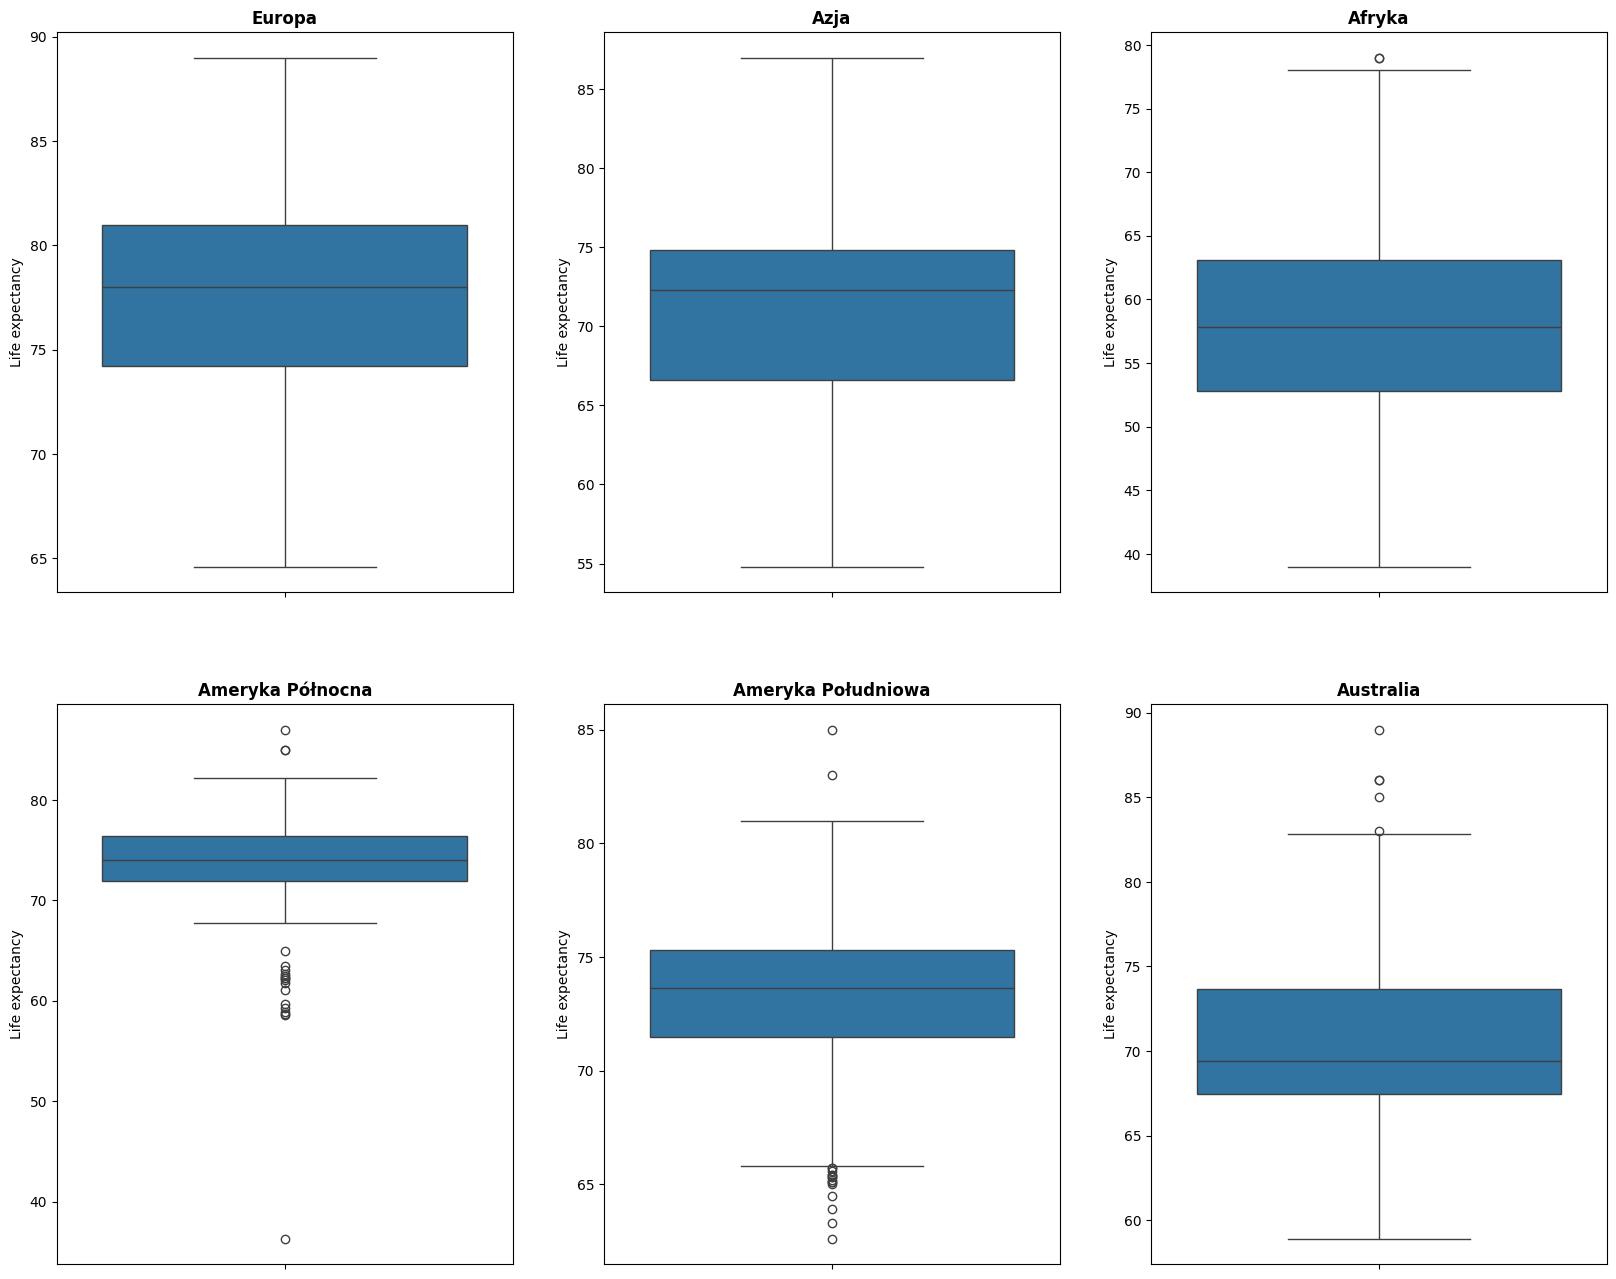

In [45]:
fig, ax = plt.subplots(2,3, figsize=(20,16))
sns.boxplot(y=df[df['Country'].isin(europe)]['Life expectancy'], ax=ax[0,0], )
ax[0,0].set_title('Europa', fontweight='bold')
sns.boxplot(y=df[df['Country'].isin(asia)]['Life expectancy'], ax=ax[0,1])
ax[0,1].set_title('Azja',fontweight='bold')
sns.boxplot(y=df[df['Country'].isin(africa)]['Life expectancy'], ax=ax[0,2])
ax[0,2].set_title('Afryka', fontweight='bold')
sns.boxplot(y=df[df['Country'].isin(north_america)]['Life expectancy'], ax=ax[1,0])
ax[1,0].set_title('Ameryka Północna', fontweight='bold')
sns.boxplot(y=df[df['Country'].isin(south_america)]['Life expectancy'], ax=ax[1,1])
ax[1,1].set_title('Ameryka Południowa', fontweight='bold')
sns.boxplot(y=df[df['Country'].isin(australia)]['Life expectancy'], ax=ax[1,2])
ax[1,2].set_title('Australia', fontweight='bold')

Jak wynika z przedstawionych przez nas statystyk przewidywana długość życia jest na większości kontynentów podobna i w większości krajów na kontynencie waha się w przedziale 67-75 lat. W statystyce tej wyróżnia się Europa, gdzie dla przeciętnego kraju statystyka ta waha się raczej w przedziale 75-80 oraz Afryka gdzie statystyka waha się w przedziale 53-63. Odpowiada to naturalnym postrzeganiom na temat stopnia rozwinięcia krajów leżących na danych kontynentach. Jak wiadomo w Afryce dostęp do edukacji jest raczej słaby, a zmienna ta podczas analizy korelacji była silnie skorelowana z przewidywaną długością życia. W przypadku Europy dostęp do edukacji jest raczej łatwy co może pozytywnie wpływać na przewidywaną długość życia.

Przy budowie modelu regresyjnego warto będzie zbadać również jak przypisanie państw do poszczególnych kontynentów i dołączenie tej informacji do modelu wpływa na jego parametry. Jednakże ze względu na typ atrybutu "kontynenty" (atrybut kategoryczny) ujęcie tej informacji w modelu będzie wymagało odpowiednich przekształceń (np. one-hot encoding, pl. kod 1 z n).